# COGS 118A- Project Checkpoint

# Names
- Joshua Garcia
- Rey Mendoza
- Ryan Burden
- Terence Ting

# Abstract 
The purpose of this project is to select and optimize a model that is appropriate for the task of classifying pictures of food with varying degrees of noise into food categories. Our models will be evaluated by classification error metrics. The datapoint, 'food101' consists 101,000 labeled images of food. Each datapoint has the dimensionality (256, 256, 3), as each image is 256 x 256 in resolution has has three color channels. We will be training supervised classification methods such as random forests, as well as neural network architectures such as ResNet50 on these images and evaluating their performance on the test set. The optimal hyperparameters and architecture of our model will be determied with cross-validated error. Finally, test set precision and recall will be used to evlauate the performance of each model.

# Background

This dataset of food images was previously used by Bossard <i>et al</i>.<a name="bossard"></a>[<sup>[1]</sup>](#bossardnote) in a similar food image classification study where they sought to automatically recognize pictured dishes using Random Forests to discriminate between key areas of the images, allowing them to classify different parts of the image simultaneously. There, they detailed how classical approaches to image classification use interest point descriptors before being transformed into a vectorial-representation of the image and using Support Vector Machines for classification. They also bring to attention the novel technique of classifying certain objects or parts of an image by using Deformable Part-based Models for object detection <a name="felzenszwalb"></a>[<sup>[2]</sup>](#felzenszwalbnote).

Focusing instead on the food recognition part of the paper, they reference a paper by Joutou <a name = "joutou"></a>[<sup>[3]</sup>](#joutounote) which used a private dataset of Japanese dishes for training and classification whereas Kawano <a name = "kawano"></a>[<sup>[4]</sup>](#kawanonote), while also using a private dataset of Chinese dishes, made use of DPM to locally pool features to aid in food categorization. Furthermore, in a paper by Yang <i>et al</i>. <a name = "yang"></a>[<sup>[5]</sup>](#yangnote), the goal was to use images of food and learn the spatial relationships between the different ingredients in the dish using pairwise features. Bossard et al. commented that this particular approach would only be feasible for meals with a standardized layout. 

As presented by Bossard <i>et al</i>.<i>et al</i>.<a name="bossard"></a>[<sup>[1]</sup>](#bossardnote), the problem of food classification becomes increasingly relevant given the “abundance of food photography in social networks”. From mundane tasks such as the organization of a collection of food photos to tasks such as helping patients with diabetes easily track and count their calorie intake <i>et al</i>.<a name="bossard"></a>[<sup>[1]</sup>](#bossardnote), classifying images of food has many use cases in today’s society.

# Problem Statement

For those not well-versed in the culinary arts, identifying and naming different dishes, especially with the prevalence of food across social media, may serve as a challenge. We aim to train some machine learning algorithm to recognize and classify the images of food in this repository so that the algorithm can, with some level of accuracy, correctly classify new images that are input by the user. The success of this machine learning algorithm would be determined by the proportion of images it correctly classifies.

In contrast, others might use image classification to perform facial recognition or facial detection in an image which essentially uses features to make decisions on the given image. In our case we would use similar methods to try to detect features from images of food. 

This problem also faces the issue of non-linearity. Since this is an image which has various forms of noise as well as images taken from different angles and shapes we face the consequence of non-linear data. Meaning our model complexity would increase due to the variable extra handling. 

# Data


We plan on using the Food-101 Dataset. 

- https://www.kaggle.com/datasets/dansbecker/food-101?select=food-101.zip
- 101 Different food categories, each category of food has various different variations of that food image. In total there are 101,000 images each photo ranges from 384 - 512x384 - 512 pixels. We are given 750 training images as well.
- An observation is a photo of a specific type of food
- Each category of food is considered its own variable, the photos are stored by their category of food and labled the count of which photo they are. ie.(Pizza_1).
- Transformations and images are already centered and properly organized and labled such that we won’t need to take extra special data cleaning to manage this dataset. That said, we do plan on adding extra distortion to these images to test our algorithms accuracy with images that have distortion such as gaussian blur, extra noise, or discoloration.
-Each image class will have the same number of images compared to every other class, that is 1000 images per class in order to ensure that each image class is balanced.


# Proposed Solution
Our proposed solution would be to use a deep learning model, Support Vector Machines, and K-Nearest Neighbors in three different image classification models and compare their overall performance when trained on our repository of photos. The paper we based our project on instead uses a Random Forests model to achieve an accuracy of 54-58%. 

We are considering applying ResNet50, which is a deep learning model with that is used for image classification with relatively high accuracy. Using 48 convolution layers and pretrained over 1 million images from the imageNet database allows the model to classify images into 1000 categories.

# Evaluation Metrics
The best evaluation metrics to perform when doing classification are accuracy, precision, and recall. We will find accuracy by dividing the number of predicted class by the number of actual correct in the class. This will give us how well our model predicts the right answer. The precision metric will allow us to see if our model is making too many false positives or false negatives, and is given by dividing the number of true positive by the total predicted positive. Then we use recall metric to find the true predicted positive divided by the total actual positive. We would also like to use an F1 score so that we can see which model contains the highest precision and highest recall to evaluate each model. We can also use the AUC-ROC method where we plot the true positive rate vs the false positive rate and get the area under the curve. The higher the area we get, the better the overall model performance. We can then compare the area amongst the models we select for testing.

# Preliminary results

Disclaimer*
We have not done any analysis of model accuracy with our dataset yet, this is due to the fact that we need to perform more research on how to impliment the models on image data, we also want to ensure that our models are done correctly to make sure our results come out accurate. 

We plan on meeting with TA's to further discuss the correct course of action to help us design our models. 

Although we have not done model accuracy testing yet, we have completed our EDA and we have designed our features that we expect to use from our data. and we have designed our validation accuracy algorithm as shown below. We just need to impliment the models to provide data to our validation code. 

Also note* All of our code is in the notebook cogs118AProj.ipynb. We have included code snippits here to make it easier to read for the grader





Data Wrangling/ Cleaning

This code below is to scale each image to the size 256 x 256. That way we are able to ensure that all of our data is uniform.

In [17]:

#ScaledDir = "food-101/food-101/imagesScaled/"

#for cat in categories:
#    try:
#        os.makedirs(ScaledDir + '/' + cat + '/')
#    except:
#        donothing = 0
#Scale Images
#from PIL import Image, ImageStat

#originalDir = "food-101/food-101/images/"


#def scaler(directy):
#    print(originalDir + directy)
#    image = Image.open(originalDir + directy)
#    img = image.resize((256, 256))
#
#    img.save(ScaledDir + directy)
#
#for i in range(len(PhotosByCategory)):
#   for path in PhotosByCategory[i]:
#       #print(path)
#       scaler(path)


EDA

Here we demonstrate our data analysis. At the bottom you will see our findings

In [18]:
#Get Average color
#def avgColor(directory):
#    src_img = cv2.imread(directory)
#    average_color_row = np.average(src_img, axis=0)
#    average_color = np.average(average_color_row, axis=0)
#    r = average_color[0]
#    g = average_color[1]
#    b = average_color[2]
#    return r,g,b

#Dont run this code. Takes 15 minutes to run. Images have been generated and saved Shown below.
#rVals = []
#gVals = []
#bVals = []
#dir = "food-101/food-101/images/"
#for itr in range(len(PhotosByCategory)):
#    for direct in PhotosByCategory[itr]:
#        #print(dir + direct)
#        r, g, b = avgColor(dir + direct)
#        rVals.append(r)
#        gVals.append(g)
#        bVals.append(b)
from IPython.display import Image

#Color distributions
#Red
#fig, ax = plt.subplots()
#ax.hist(rVals, bins=10100)
#pyplot.show()
#Image(filename='Red.png')
#Green
#fig, ax = plt.subplots()
#ax.hist(gVals, bins=10100)
#pyplot.show()
#Image(filename='Green.png')
#blue
#fig, ax = plt.subplots()
#ax.hist(bVals, bins=10100)
#pyplot.show()
#Image(filename='Blue.png')
#def brightness(im_file):
#   im = Image.open(im_file).convert('L')
#   stat = ImageStat.Stat(im)
#   im.close
#   return stat.rms[0]
#Some EDA
#PhotosByCategoryLength = len(PhotosByCategory)
#NumPhotosByCategory = len(PhotosByCategory[0])
#TrainingDataLength = len(trainData)
#TestDataLength = len(testData)
#totalNumPhotos = TrainingDataLength + TestDataLength

#print("Total number of categories: " + str(PhotosByCategoryLength))
#print("Total number of photos per category: " + str(NumPhotosByCategory))
#print("Total number of training data images: " + str(TrainingDataLength))
#print("Total number of test data images: " + str(TestDataLength))
#print("Total number of photos: " + str(totalNumPhotos))

#avgBrightness = 0
#for i in range(TrainingDataLength):
#    avgBrightness = brightness(dir + trainData[i]) + avgBrightness
#for b in range(TestDataLength):
#    avgBrightness = brightness(dir + testData[b]) + avgBrightness
#lum = avgBrightness/totalNumPhotos

#print("The average degreee of luminance is: 133.24769382799204 SI units, Note this number was generated before however the runtime was very long. The code has been commented out for runtime.")

#print("Our test to training ration is: " + str(len(testData)/len(trainData)))


#print("Categories List: " + Categories)


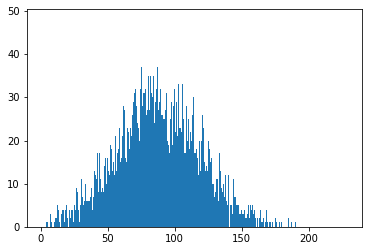

In [19]:
Image(filename='Red.png')

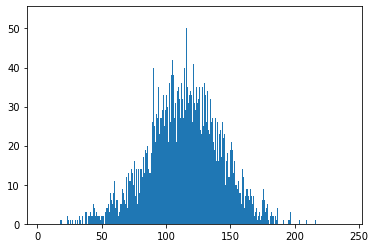

In [20]:
Image(filename='Green.png')

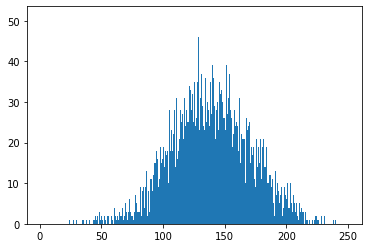

In [21]:
Image(filename='Blue.png')

In the images above you'll notice three histograms that show the range of the 10100 images that we have and their average color channels. Youll notice that there are various images that widely range from different colors such that it would present a bit of a challenge for us to use color data to make classifications. From this analysis we learn that we would be better off using greyscale to do our analysis to avoid introducing extra noise in our model selection. Especially when observing the extreme outliars in some images where the distribution isn't completely even.

Total number of categories: 101

Total number of photos per category: 1000

Total number of training data images: 75750

Total number of test data images: 25250

Total number of photos: 101000

The average degreee of luminance is: 133.24769382799204 SI units, Note this number was generated before however the runtime was very long. The code has been commented out for runtime.

Our test to training ration is: 0.3333333333333333

Categories List: apple_pie, baby_back_ribs, baklava, beef_carpaccio, beef_tartare, beet_salad, beignets, bibimbap, bread_pudding, breakfast_burrito, bruschetta, caesar_salad, cannoli, caprese_salad, carrot_cake, ceviche, cheesecake, cheese_plate, chicken_curry, chicken_quesadilla, chicken_wings, chocolate_cake, chocolate_mousse, churros, clam_chowder, club_sandwich, crab_cakes, creme_brulee, croque_madame, cup_cakes, deviled_eggs, donuts, dumplings, edamame, eggs_benedict, escargots, falafel, filet_mignon, fish_and_chips, foie_gras, french_fries, french_onion_soup, french_toast, fried_calamari, fried_rice, frozen_yogurt, garlic_bread, gnocchi, greek_salad, grilled_cheese_sandwich, grilled_salmon, guacamole, gyoza, hamburger, hot_and_sour_soup, hot_dog, huevos_rancheros, hummus, ice_cream, lasagna, lobster_bisque, lobster_roll_sandwich, macaroni_and_cheese, macarons, miso_soup, mussels, nachos, omelette, onion_rings, oysters, pad_thai, paella, pancakes, panna_cotta, peking_duck, pho, pizza, pork_chop, poutine, prime_rib, pulled_pork_sandwich, ramen, ravioli, red_velvet_cake, risotto, samosa, sashimi, scallops, seaweed_salad, shrimp_and_grits, spaghetti_bolognese, spaghetti_carbonara, spring_rolls, steak, strawberry_shortcake, sushi, tacos, takoyaki, tiramisu, tuna_tartare, waffles,

In the cell above we display all of the different variables and types of data we will be working with, one significant finding was the luminance rating. We notice that our average luminance of our images is relatively low, moody, making it an extra challenge since our photos on average tend to lean on the darker side. This makes sense since a lot of the images are of darker foods like beef and chocolate which is dark. We also wanted to highlight how much data we will be working with and highlight the challenge that comes with using such a large amount of data.

We frequently found that runtime for this data is very long making it harder for us to debug. However this also gives us an advantage. Our test/train split would be very representativie of the data since the dataset is large enough where a 33% split won't impact our averages as much. 

Finally, from our own analysis in the images, we found that there is quite a bit of noise in the images, such as plate color appearing in images, background noise like tables or forks, and finally the biggest noise being the camera, since the way it was taken was not uniform. Each camera was calibrated differently and each photo was taken from different angles making it essential that we fine tune our models to try and circumvent this noise such as using a gradient.. 

Validation curve

In [22]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score
y_test = [1, 2]
y_test = np.array(y_test)
y_predicted = [1, 2]
y_predicted = np.array(y_predicted)


def scores(y_test, y_predicted):

    precision = precision_score(y_test, y_predicted)
    recall = recall_score(y_test, y_predicted)
    accuracy = accuracy_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted)
    auc = np.round(roc_auc_score(y_test, y_predicted), 3)

    return precision, recall, accuracy, f1, auc


In [23]:
import pandas as pd
precision_1, recall_1, accuracy_1, f1_1, auc_1 = scores(y_test, y_predicted)
precision_2, recall_2, accuracy_2, f1_2, auc_2 = scores(y_test, y_predicted)
data = {'model 1': [precision_1, recall_1, accuracy_1, f1_1, auc_1], 'model 2': [
    precision_2, recall_2, accuracy_2, f1_2, auc_2]}
df = pd.DataFrame(data)
df_new = df.rename(index={0: 'precision', 1: 'recall',
                   2: 'accuracy', 3: 'f1 score', 4: 'auc'})
df_new


,model 1,model 2
precision,1.0,1.0
recall,1.0,1.0
accuracy,1.0,1.0
f1 score,1.0,1.0
auc,1.0,1.0


In [24]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_roc_curve
plot_1 = plot_roc_curve(model_1, X_test, y_test)
plot_1
plot_2 = plot_roc_curve(model_2, X_test, y_test)
plot_2



NameError: name 'model_1' is not defined

In [ ]:
# learning curve plot
size, y_train, y_test = learning_curve(
    model, X, y, cv=10, scoring='accuracy', n_jobs=-1, size=len(X))

y_train_mean = np.mean(y_train, axis=1)
y_test_mean = np.mean(y_test, axis=1)

plt.plot(size, train_mean, '--', color="#1",  label="Training score")
plt.show()


# Ethics & Privacy

If our model is being used to find out what food someone is looking at, if we return a badly classified result then this would normally be okay as the user would know not to fully rely on a model that could predict wrong. But in one severe case, some people's cultures pride themselves on their food and having someone learn the incorrect food and tell someone of that culture that their food is actually something else (the wrong classification our model gave) then this could offend and disrespect said cultures. As such we need to ensure our model has high accuracy and precision but also let the user of the model know that the model is not perfect and should not think all returned classification values are final.

To avoid any problems from unintended issues, we intend to try to fix such issues by allowing for our model to be reviewed by people and raise issues that we may have unforeseen. Upon acknowledgement of such issues, we will review the model and think of solutions that we can implement that will change the model that will solve the issue but at the same time return accurate results.

To make sure we are considering ethics, we will attempt to create a checklist that will ensure that all ethical implications are understood and therefore minimized.

# Team Expectations 


* *Team Expectation 1*: Communicate with other team members in case of delays to our work
* *Team Expectation 2*: Work on assigned work in a timely manner
* *Team Expecation 3*: Ensure work is assigned evenly
* *Team Expecation 4*: Ask for help always when needed
* *Team Expecation 5*: Try to finish work a day before its due to ensure no late turn in deduction.
* *Team Expecation 6*: If needed, we will vote on decisions as we develop this project.
* *Team Expecation 7*: If in case of conflict, we should attempt to resolve it by holding a conversation with the whole group and ensure everybody is understood.

**Individual Expectations**:

Joshua: EDA & data visualization, final paper.(results and discussion)

Ryan: Algorithm selection, model selection, final paper.(abrstract & problem)

Rey: EDA, data preprocessing, final paper.(methods)

Terence: Model selection, algorithm selection, final paper.(problem & methods)

# Project Timeline Proposal


| 4/8  |  1 PM | Passively think of good ideas, topics of interest. 

| 4/20  |  10 AM |  Search for datasets, brainstorm project ideas. | Choose final dataset and idea.(all) | 

| 4/24  | 6 PM  | Submit final proposal.  | Divide workload among group members.(all)   |

| 5/10  | 2 PM  | Examine datset characteristics and structure.|EDA and Wrangling/preprocessing if necessary(Joshua and Terence) |

| 5/19  | 2 PM  | Reserach which algorithms to try. | Algorithm selection. SVM vs CNN. Compare F1 score, misclassification error, and compuatational expense.(all) |

| 5/25  | 2 PM  | Begin paper. | Final model selection and validation. Optimize hyperparameters with cross validation. Discussion of results and final evaluation(all) |

| 6/8  | Before 11:59 PM  | Proofread and finalize paper. Complete code annotations and polish the  JupyterNotebook(all) | Turn in Final Project!  |

# Footnotes
<a name="bossardnote"></a>1.[^](#bossard): Bossard <i>et al</i>. (Sep 2014) Food-101 - Mining Discriminative Components with Random Forests. https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf<br>
<a name="felzenszwalbnote"></a>2. [^](#felzenszwalb): Felzenszwalb, P.F., Girshick, R., McAllester, D., Ramanan, D.: Object detection
with discriminatively trained part based models. PAMI (2010)<br>
<a name="joutounote"></a>3. [^](#joutou): Joutou, T., Yanai, K.: A food image recognition system with Multiple Kernel Learning. In: ICIP (2009)<br>
<a name="kawanonote"></a>4. [^](#kawano): Kawano, Y., Yanai, K.: Real-Time Mobile Food Recognition System. In: IEEE Conference on Computer Vision and Pattern Recognition Workshops (2013)<br>
<a name="yangnote"></a>5. [^](#yang): Yang, S.L., Chen, M., Pomerleau, D., Sukthankar, R.: Food recognition using statistics of pairwise local features. In: CVPR (2010)